In [4]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import copy
import csv
import math

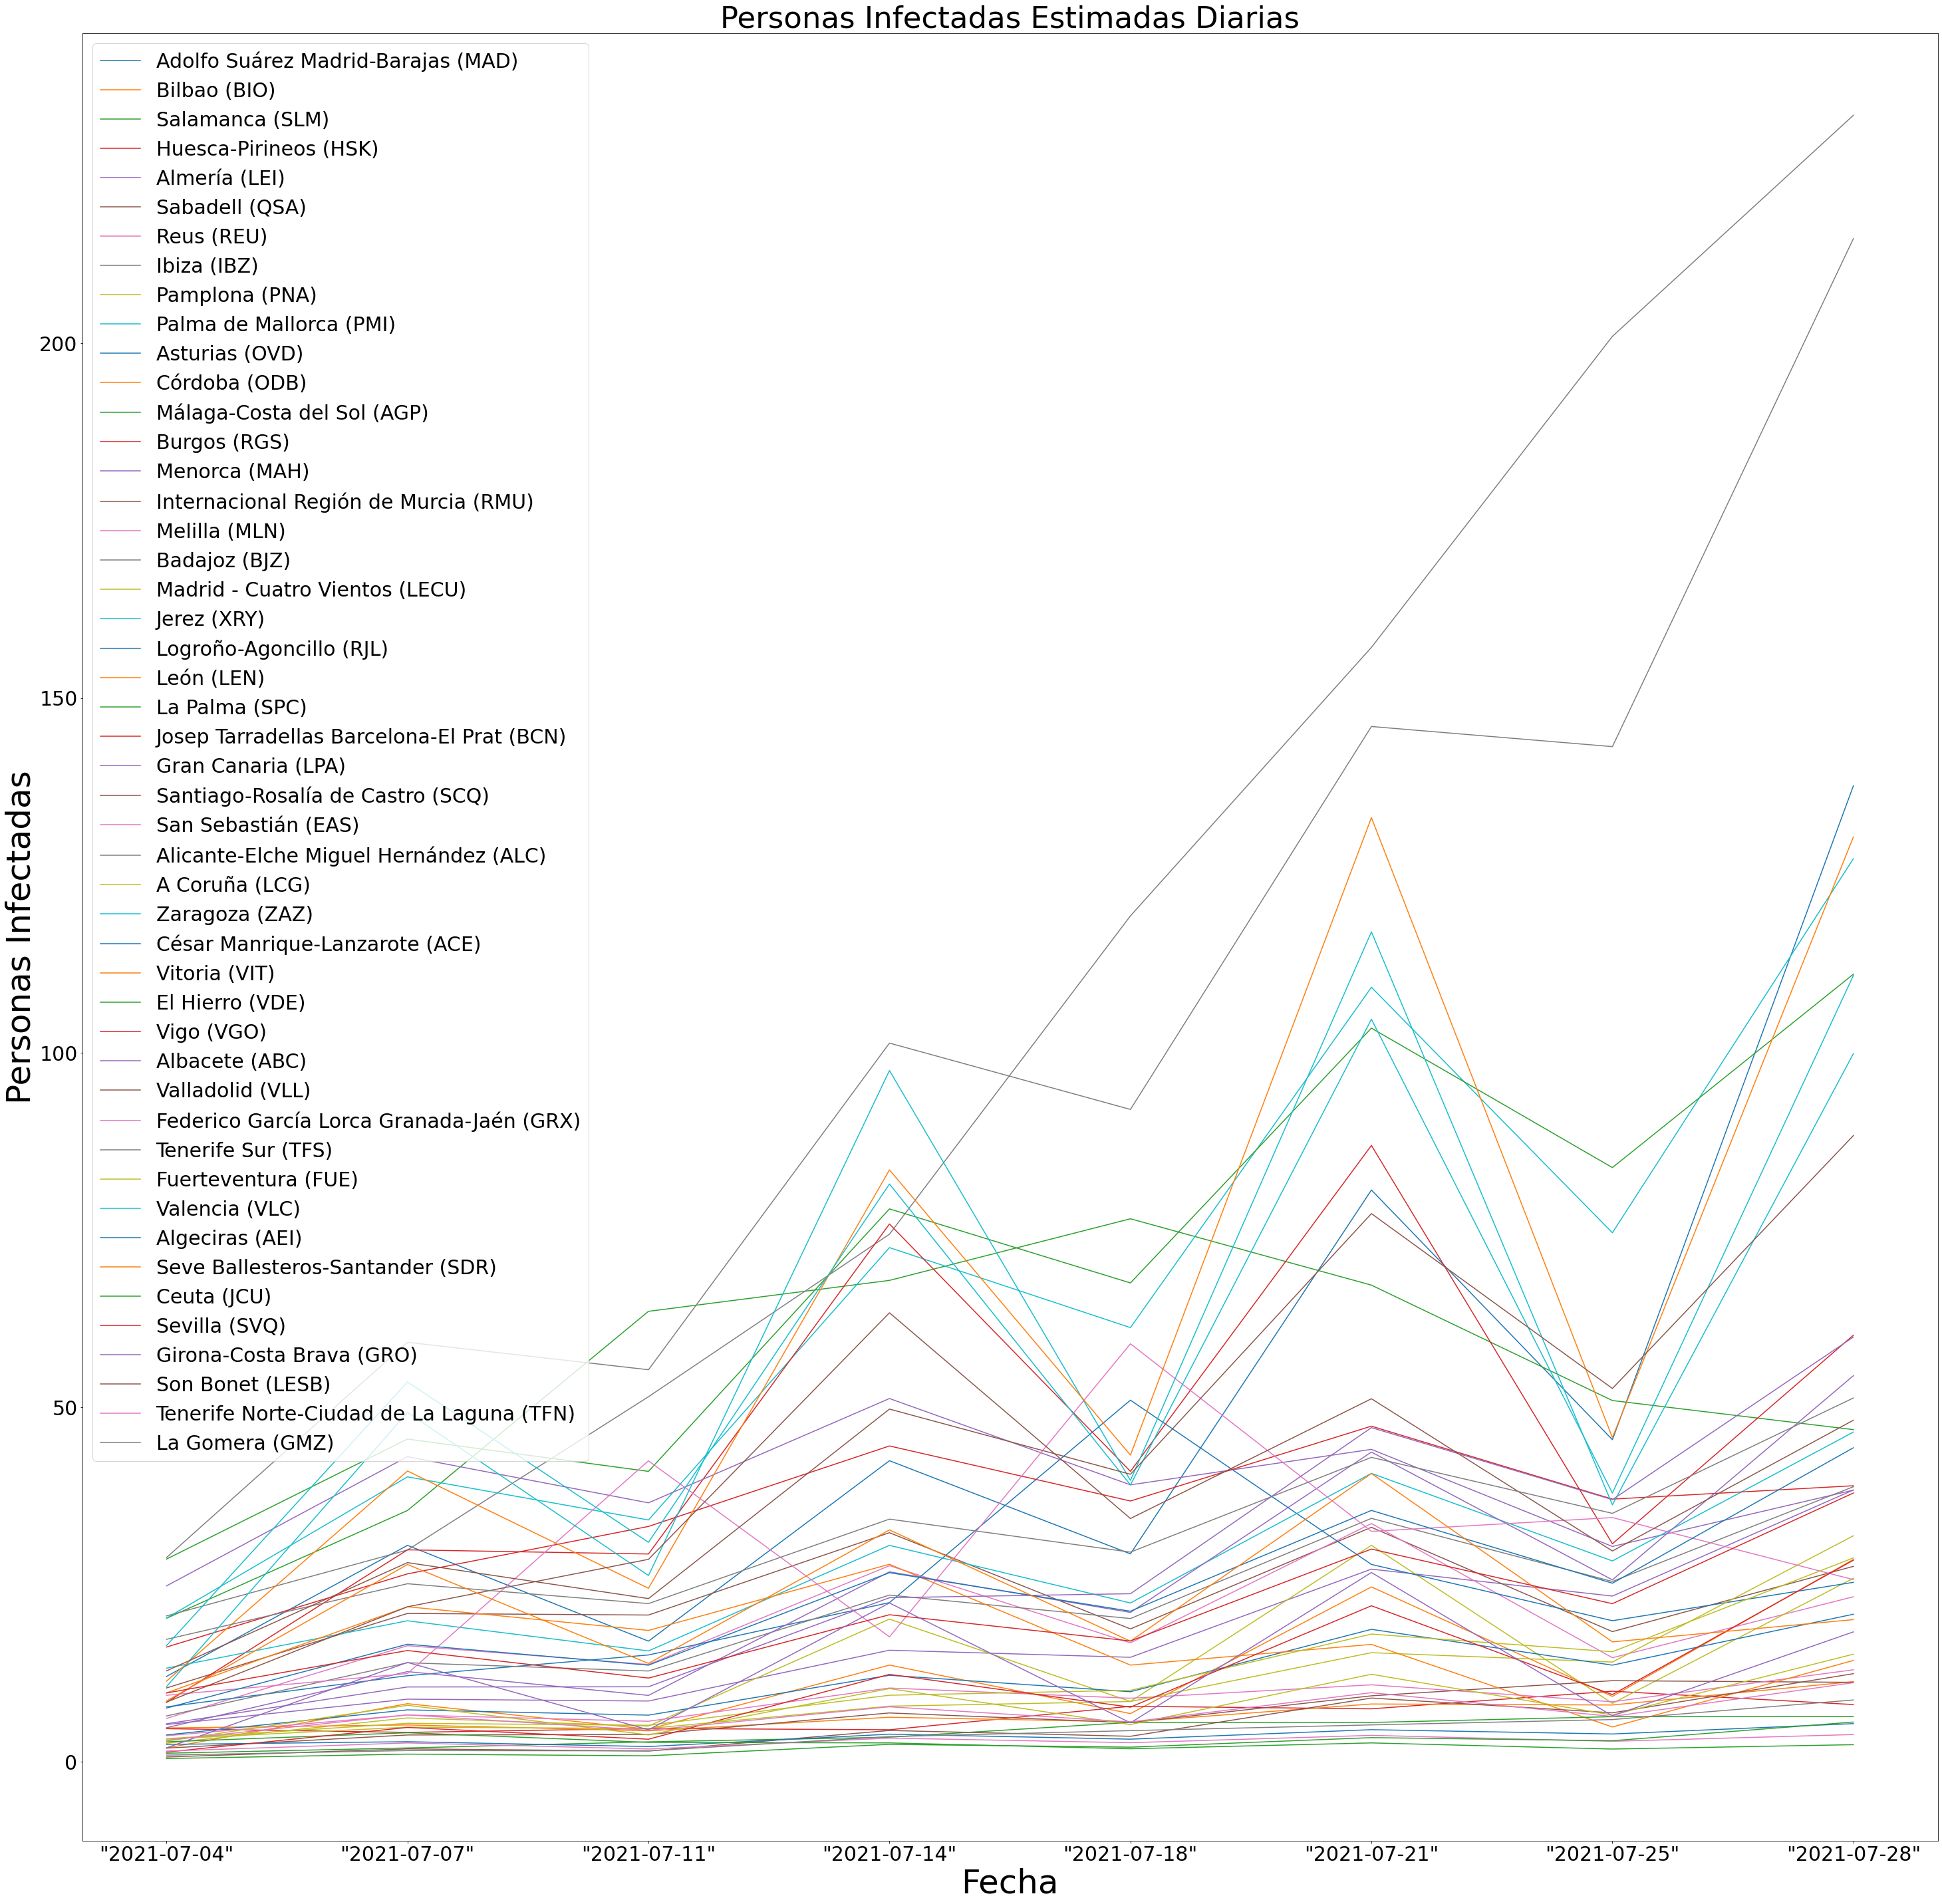

<Figure size 3600x3600 with 0 Axes>

In [44]:
csv= pd.read_csv('riesgo.csv')
csv = csv.sort_values(['Fecha'],axis=0)
grupos = csv.groupby('Aeropuerto')
aeropuertos = csv['Aeropuerto'].drop_duplicates().tolist()
fechas = csv['Fecha'].drop_duplicates().tolist()
plt.figure(figsize=(50,50))
for i in aeropuertos:
    a= grupos.get_group(i)
    plt.plot(a['Fecha'],a['CasosEstimados'],label=i)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("Personas Infectadas Estimadas Diarias",fontsize=45)
plt.xlabel("Fecha",fontsize=50)
plt.ylabel("Personas Infectadas",fontsize=50)
plt.legend(prop={'size': 30})
plt.savefig("PersonasEstimadas.jpg")
plt.figure(figsize=(50,50))
plt.show()
    

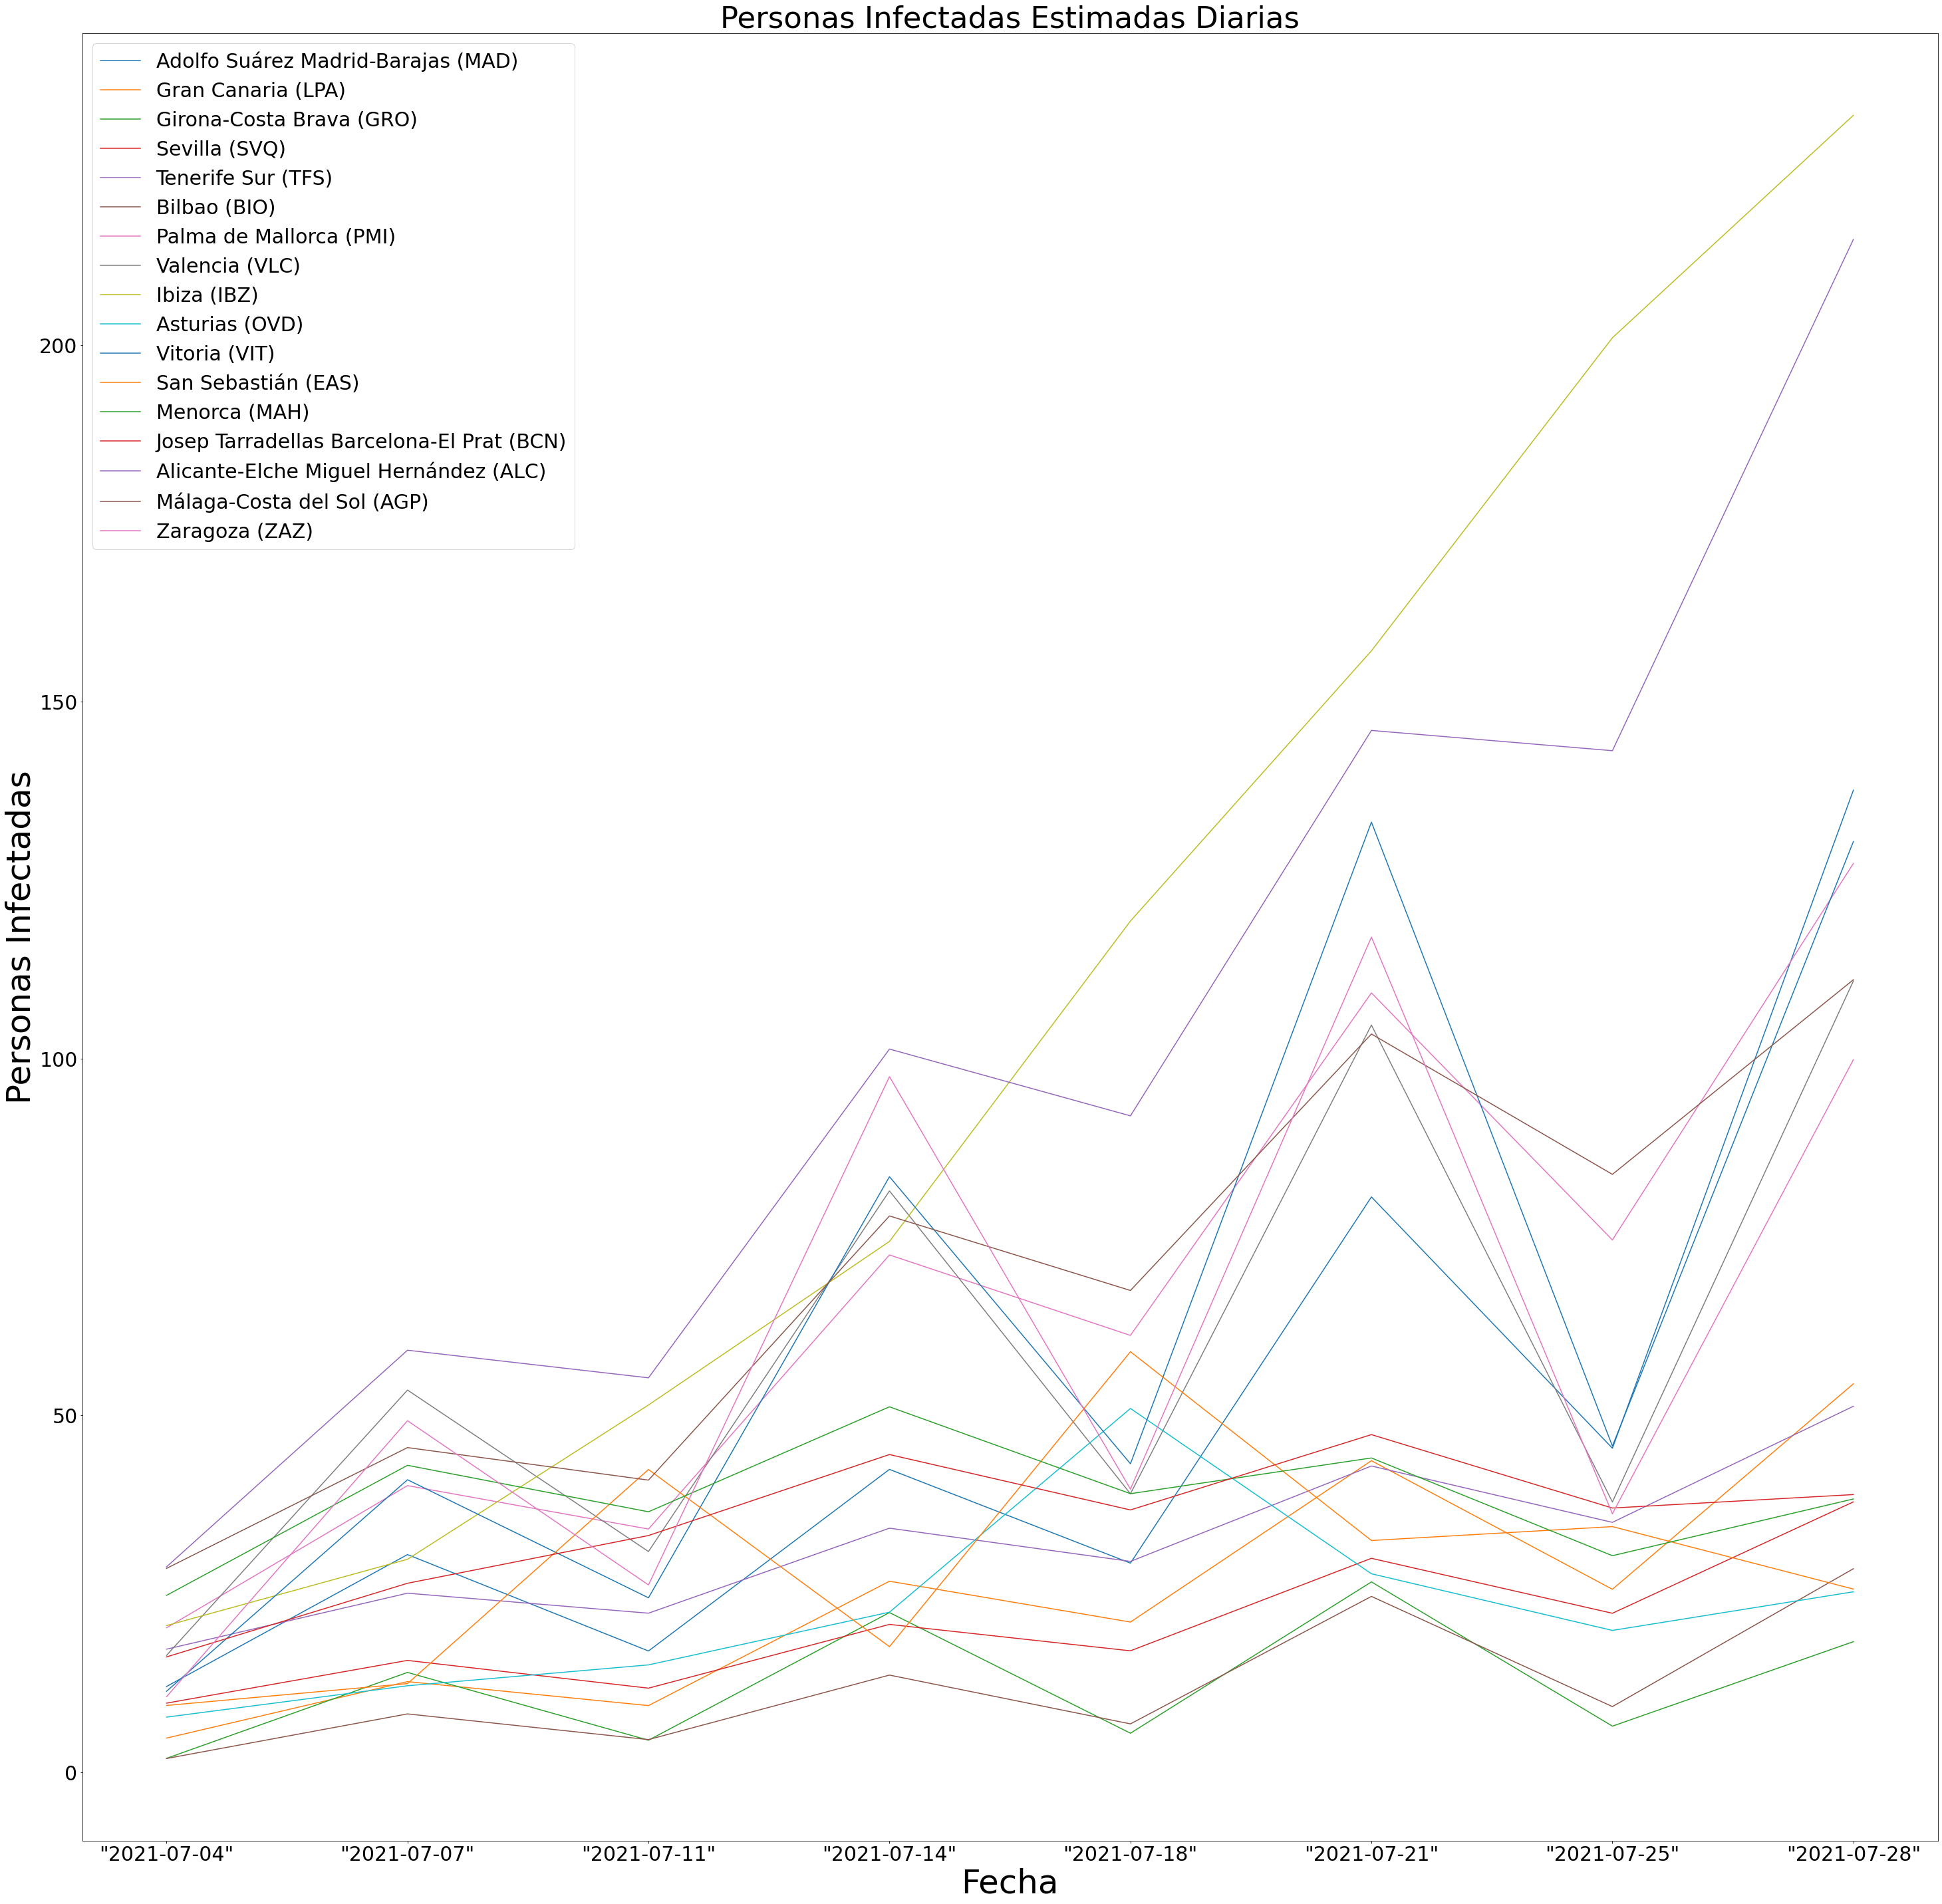

<Figure size 3600x3600 with 0 Axes>

In [43]:
csv= pd.read_csv('riesgoPrincipal.csv')
csv = csv.sort_values(['Fecha'],axis=0)
grupos = csv.groupby('Aeropuerto')
aeropuertos = csv['Aeropuerto'].drop_duplicates().tolist()
fechas = csv['Fecha'].drop_duplicates().tolist()
plt.figure(figsize=(50,50))
for i in aeropuertos:
    a= grupos.get_group(i)
    plt.plot(a['Fecha'],a['CasosEstimados'],label=i)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("Personas Infectadas Estimadas Diarias",fontsize=45)
plt.xlabel("Fecha",fontsize=50)
plt.ylabel("Personas Infectadas",fontsize=50)
plt.legend(prop={'size': 30})
plt.savefig("PersonasEstimadasPPrincipales.jpg")
plt.figure(figsize=(50,50))
plt.show()
    

In [7]:
csv= pd.read_csv('Expansion.csv')
for index, row in csv.iterrows():
    csv['Flujo'][index]=row['Flujo']*2
print(csv)
csv.to_csv("DicRiesgo.csv")

        Fecha         P   Flujo
0  2020-03-16  1.903886  1451.0
1  2020-03-18  1.829805  1366.0
2  2020-03-20  1.979939  1362.0
3  2020-03-22  2.306758   773.0
4  2020-03-24  2.039587  1105.0
5  2020-03-26  3.114899  1098.0
6  2020-03-28  3.047594   903.0
7  2020-03-30  1.976608  1998.0
8  2020-03-31  3.780743  1998.0


C:\Users\Asus\AppData\Local\Temp/ipykernel_2012/1790467471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['Flujo'][index]=row['Flujo']*2


In [12]:
csv= pd.read_csv('Expansion.csv')
prob=[]
for index, row in csv.iterrows():
    prob.append(row['P']/row['Flujo'])
csv['Prob']=prob
print(csv)
csv.to_csv("DicRiesgo.csv")

        Fecha         P  Flujo      Prob
0  2020-03-16  1.903886  725.5  0.002624
1  2020-03-18  1.829805  683.0  0.002679
2  2020-03-20  1.979939  681.0  0.002907
3  2020-03-22  2.306758  386.5  0.005968
4  2020-03-24  2.039587  552.5  0.003692
5  2020-03-26  3.114899  549.0  0.005674
6  2020-03-28  3.047594  451.5  0.006750
7  2020-03-30  1.976608  999.0  0.001979
8  2020-03-31  3.780743  999.0  0.003785


In [10]:
csv= pd.read_csv('MadridCon0.csv')
csv = csv.sort_values(['Distrito','Fecha'],axis=0)

distrito='ultimo'
flujo='ultimo'
ind='ultimo'
for index, row in csv.iterrows():
    if flujo!=0.0 and row['Flujo']==0.0 and distrito==row['Distrito']:
        csv['Flujo'][index]=flujo/2
        csv['Flujo'][ind]=flujo/2
    distrito=row['Distrito']
    flujo=row['Flujo']
    ind=index
csv.to_csv("MadridCon0.csv")

C:\Users\Asus\AppData\Local\Temp/ipykernel_1740/2628204712.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['Flujo'][index]=flujo/2
C:\Users\Asus\AppData\Local\Temp/ipykernel_1740/2628204712.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['Flujo'][ind]=flujo/2


In [30]:
csv= pd.read_csv('MadridMunicipiosCorrgido.csv')
poblacion=pd.read_csv('DicRiesgo.csv')
poblacionSeries=pd.Series(poblacion['Prob'].values.tolist(), 
            index=poblacion['Fecha'].values.tolist())
pob=[]
for index, row in csv.iterrows():
   
    if row['Flujo']==0:
        pob.append(0)
    else:
        p=poblacionSeries[row['Fecha']]
        pob.append(row['Flujo']*p)
csv['Casos']=pob
print(csv)
csv.to_csv("MadridMunicipiosCorrgido.csv")

     Unnamed: 0  Unnamed: 0.1       Fecha          Municipio  Flujo  \
0             0             0  2020-03-15         Alcobendas      0   
1             1             1  2020-03-16         Alcobendas    109   
2             2             2  2020-03-17         Alcobendas      0   
3             3             3  2020-03-18         Alcobendas    107   
4             4             4  2020-03-19         Alcobendas      0   
..          ...           ...         ...                ...    ...   
114         114           114  2020-03-27  Torrejon De Ardoz      0   
115         115           115  2020-03-28  Torrejon De Ardoz     42   
116         116           116  2020-03-29  Torrejon De Ardoz      0   
117         117           117  2020-03-30  Torrejon De Ardoz     57   
118         118           118  2020-03-31  Torrejon De Ardoz     70   

     inc.casos14  inc2.casos14  ri.probCont     Casos  
0          37.59        152.08     1.589029  0.000000  
1          44.43        151.23     

In [31]:
df=pd.read_csv('ModeloMadrid.csv')
df.head()
del df['Fecha']
df

,Fecha,Municipio,Flujo,Inc,Inc14,Casos,Poblacion
0,2020-03-28,Alcobendas,63,160.63,176.86,0.425246,116589
1,2020-03-22,Alcobendas,72,83.73,204.20,0.429719,116589
2,2020-03-31,Alcobendas,85,159.77,187.97,0.321685,116589
3,2020-03-24,Alcobendas,91,99.11,227.27,0.335932,116589
4,2020-03-26,Alcobendas,96,126.45,226.42,0.544682,116589


In [14]:
df.corr(method='pearson')
print(df)

,Inc,Inc14
Inc,1.000000,0.171829
Inc14,0.171829,1.000000


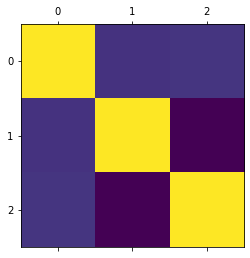

In [8]:
plt.matshow(df.corr())

Text(0.5, 0, 'Casos')

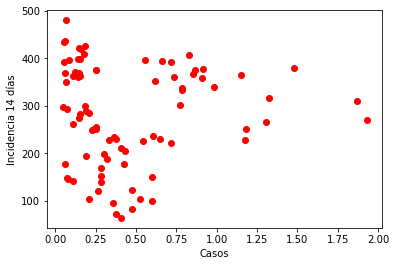

In [34]:
plt.plot(df['Casos'],df['Inc14'],'ro')
plt.ylabel('Incidencia 14 días')
plt.xlabel('Casos')

Text(0.5, 0, 'Incidencia actual')

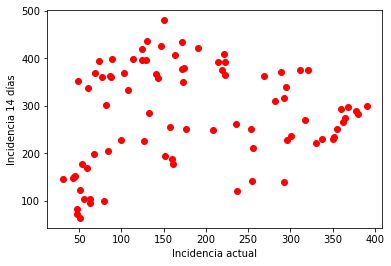

In [11]:
plt.plot(df['Inc'],df['Inc14'],'ro')
plt.ylabel('Incidencia 14 días')
plt.xlabel('Incidencia actual')

              Flujo       Inc     Inc14     Casos  Poblacion
Flujo      1.000000  0.013657  0.027240  0.832783   0.087109
Inc        0.013657  1.000000  0.171829  0.180638   0.149528
Inc14      0.027240  0.171829  1.000000  0.031457   0.212278
Casos      0.832783  0.180638  0.031457  1.000000   0.059335
Poblacion  0.087109  0.149528  0.212278  0.059335   1.000000


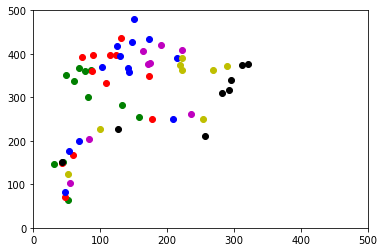

In [81]:
csv=pd.read_csv('ModeloMadrid.csv')
print(csv.corr(method='pearson'))
del csv['Municipio']
del csv['Flujo']
del csv['Poblacion']
del csv['Casos']

csv.to_csv("cor.csv")
grupos = csv.groupby('Fecha')
d16= grupos.get_group('2020-03-16')
d18= grupos.get_group('2020-03-18')
d20= grupos.get_group('2020-03-20')
d22= grupos.get_group('2020-03-22')
d24= grupos.get_group('2020-03-24')
d26= grupos.get_group('2020-03-26')
d28= grupos.get_group('2020-03-28')
d30= grupos.get_group('2020-03-30')
d31= grupos.get_group('2020-03-31')
d31.to_csv("cor.csv")
grupos = [d16,d18,d20,d22,d24,d26,d28,d30,d31]

plt.xlim([0, 500])
plt.ylim([0, 500])

plt.scatter(d16['Inc'], d16['Inc14'], c='green') 
plt.scatter(d18['Inc'], d18['Inc14'], c='red') 
plt.scatter(d20['Inc'], d20['Inc14'], c='b') 
plt.scatter(d22['Inc'], d22['Inc14'], c='m') 
plt.scatter(d24['Inc'], d24['Inc14'], c='y') 
plt.scatter(d26['Inc'], d26['Inc14'], c='k') 
plt.scatter(d28['Inc'], d28['Inc14'], c='w') 
 

plt.show() 


In [29]:
dias=[16,18,20,22,24,26,28,30,31]
correlacionCasos=[]
correlacionInc=[]
for i in grupos:
    del i['Fecha']
    cor = i.corr(method='pearson')
    correlacionCasos.append(cor['Inc14'][2])
    correlacionInc.append(cor['Inc14'][0])
print(correlacionInc)

[0.2772276311047985, 0.5061373254056869, 0.6273771306636268, 0.7248702692829251, 0.8184819848423875, 0.8829743108558326, 0.8693252398564063, 0.8501356870265199, 0.8743559994833737]


Text(0.5, 0, 'Dias')

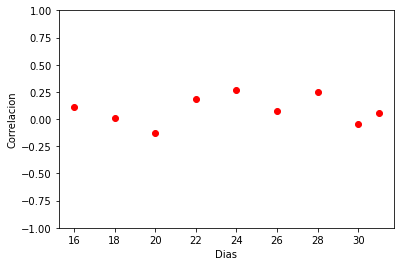

In [23]:
plt.plot(dias,correlacionCasos,'ro')
plt.ylim(-1, 1) # Set y-axis limits
plt.ylabel('Correlacion')
plt.xlabel('Dias')

Text(0.5, 0, 'Dias')

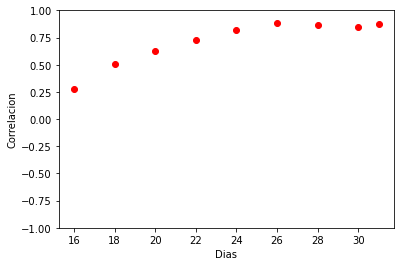

In [24]:
plt.plot(dias,correlacionInc,'ro')
plt.ylim(-1, 1) # Set y-axis limits
plt.ylabel('Correlacion')
plt.xlabel('Dias')

In [45]:
df=pd.read_csv('ModeloMadrid.csv')
del df['Municipio']
del df['Flujo']
del df['Poblacion']
del df['Fecha']
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]

y_train, X_train = dmatrices('Inc14 ~ Inc + Casos', df_train, return_type='dataframe')
y_test, X_test = dmatrices('Inc14 ~ Inc + Casos', df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Inc14   No. Observations:                   63
Model:                            GLM   Df Residuals:                       60
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1622.3
Date:                Fri, 08 Jul 2022   Deviance:                       2780.7
Time:                        18:31:56   Pearson chi2:                 2.60e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5049      0.016    333.847      0.0

In [83]:
df=pd.read_csv('ModeloMadrid.csv')
del df['Municipio']
del df['Flujo']
df['Casos^1/3']=[i**(1/3) for i in df['Casos']]
df['Casos^1/5']=[i**(1/5) for i in df['Casos']]
df['log(Inc)']=[math.log10( i ) for i in df['Inc']]
df['log(Inc14)']=[math.log10( i ) for i in df['Inc14']]

df['Casos*']=[(i['Casos']*100.000/i['Poblacion']) for index,i in df.iterrows()]
df['Casos*^1/3']=[(i['Casos']*100.000/i['Poblacion'])*(1/3) for index,i in df.iterrows()]
df['Casos*^1/5']=[(i['Casos']*100.000/i['Poblacion'])*(1/5) for index,i in df.iterrows()]
del df['Poblacion']

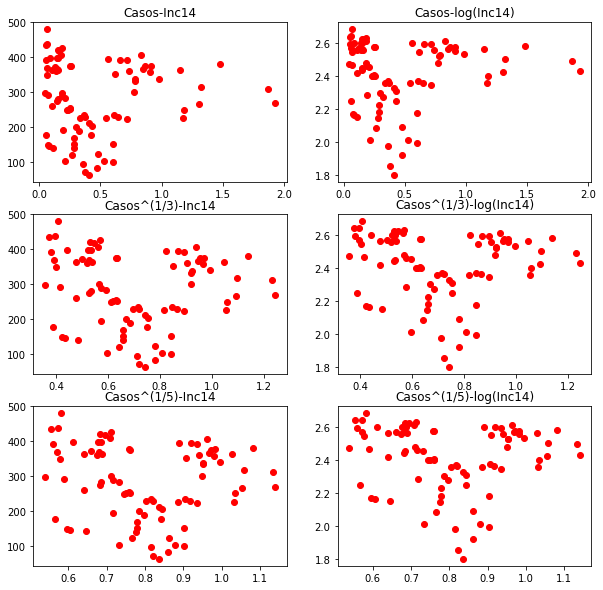

In [88]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(10,10)

ax[0,0].title.set_text('Casos-Inc14')
ax[0,0].plot(df['Casos'],df['Inc14'],'ro')
ax[1,0].title.set_text('Casos^(1/3)-Inc14')
ax[1,0].plot(df['Casos^1/3'],df['Inc14'],'ro')
ax[2,0].title.set_text('Casos^(1/5)-Inc14')
ax[2,0].plot(df['Casos^1/5'],df['Inc14'],'ro')
ax[0,1].title.set_text('Casos-log(Inc14)')
ax[0,1].plot(df['Casos'],df['log(Inc14)'],'ro')
ax[1,1].title.set_text('Casos^(1/3)-log(Inc14)')
ax[1,1].plot(df['Casos^1/3'],df['log(Inc14)'],'ro')
ax[2,1].title.set_text('Casos^(1/5)-log(Inc14)')
ax[2,1].plot(df['Casos^1/5'],df['log(Inc14)'],'ro')

plt.savefig("transformacionesCasos.jpg")
plt.show()

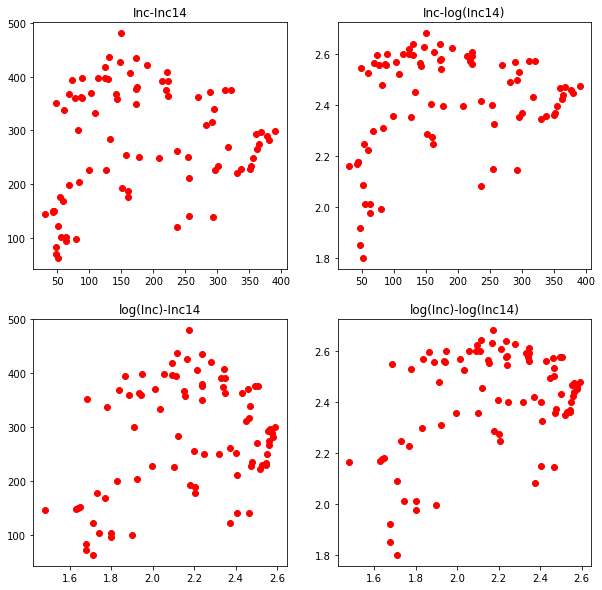

In [131]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(10,10)
ax[0,0].title.set_text('Inc-Inc14')
ax[0,0].plot(df['Inc'],df['Inc14'],'ro')
ax[1,0].title.set_text('log(Inc)-Inc14')
ax[1,0].plot(df['log(Inc)'],df['Inc14'],'ro')

ax[0,1].title.set_text('Inc-log(Inc14)')
ax[0,1].plot(df['Inc'],df['log(Inc14)'],'ro')
ax[1,1].title.set_text('log(Inc)-log(Inc14)')
ax[1,1].plot(df['log(Inc)'],df['log(Inc14)'],'ro')

plt.savefig("transformacionesInc.jpg")
plt.show()

In [132]:
tabla = df.corr(method='pearson')
tabla['Inc14']
tabla['log(Inc14)']

Inc           0.272336
Inc14         0.971402
Casos         0.066202
Casos^1/3    -0.036287
Casos^1/5    -0.059962
log(Inc)      0.406112
log(Inc14)    1.000000
Casos*       -0.249744
Casos*^1/3   -0.249744
Casos*^1/5   -0.249744
Name: log(Inc14), dtype: float64